# Trabajo final de Machine Learning

### Integrantes
- Ramiro Chavez Caituiro
- Sergio Nuñez Lazo
- Jack Cruz Mamani

### 1. Arquitectura DenseNet

La primera fase es la fase de Convolution, en esta como dice su nombre se realiza una circunvolución de 7×7 .Luego En la fase de Pooling se realiza un 3 ×3 maximun Pooling. Luego de esto sigue el primer Dense Block seguido de una capa de Transición. Tras el ultimo Dense Block ocurre la capa de Clasificación, donde se da la predicción.

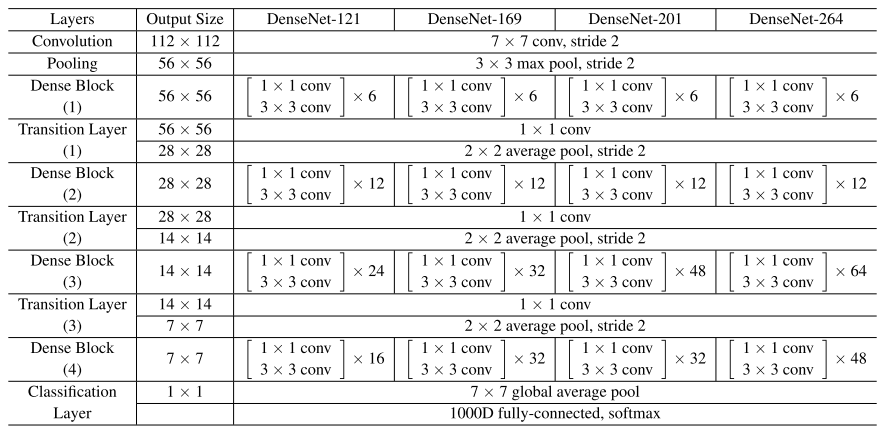

Durante las fases del Dense Block ocurre la principal característica de esta arquitectura, en esta cada capa se conecta con las demás capas como se ve en fig. 2, por lo que para L capas, existen L(L+1) /2 conexiones. Esto diferencia a esta arquitectura, ya que CNN tradicionales tienen L capas y L conexiones como se ve en fig. 3.

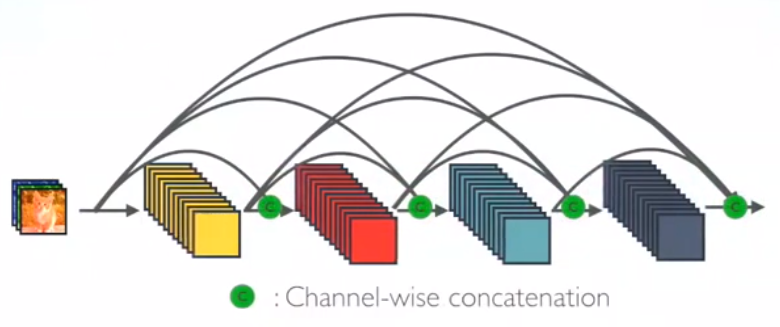

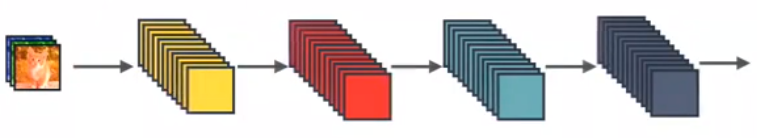

Durante la capa de Transition se realiza una normalización de Batch, posteriormente se utiliza una función de activación ReLU (Rectified Linear Unit). Este proceso es una circunvolución de 1×1 , este tiene el objetivo de crear un submuestreo y se le llama capa de cuello de botella. Posteriormente se hace otra circunvolución de 3 ×3 antes de llegar al siguiente Dense block.

### 2. Objetivo del caso

Debido a la pandemia que se sigue viviendo hasta ahora desde el año 2020, muchas personas alrededor del mundo fueron infectadas siendo mortal para cierto sector de la población. Hoy en día es importante determinar si una persona ha sufrido dicha infección ya que existe muchas personas que no saben si llegaron a infectarse con COVID y otras que creen haberlo tenido. Se sabe que personas que han sido infectadas anteriormente pueden sufrir secuelas en un futuro y es por ello que es necesario hacer estos diagnósticos en la población de manera rápida y eficiente. A lo largo de todo este tiempo se han desarrollado técnicas para diagnosticar si una persona ha sido infectada de covid los cuáles muchos de ellos son engorrosos, difíciles de llevar a cabo y tardan mucho en realizar su cometido. Es por ello que dicho trabajo de diagnóstico debería ser efectuada por una inteligencia artificial capaz de predecir en base a visualización de imágenes de ciertas regiones del cuerpo si la persona en cuestión ha sido infectado de Covid. Por ende el objetivo de caso para esta ocasión es desarrollar un proyecto de Machine learning donde se instanciará un modelo capaz de predecir si la persona fue infectada con Covid en base a imágenes de rayos X de la parte toráxica del cuerpo. 

### 3. Descripción del caso

El caso de predicción de covid 19 en base a Rayos-X busca predecir cuando un paciente tiene o no covid. Los recursos para lograr este objetivo son imágenes médicas (Rayos-X), estos se dividen en dos grupos, de entrenamiento y de prueba, la diferencia es que en el primero las imágenes estan clasificadas como covid o no por radiolólogos, en la segunda, las imágenes no tienen etiquetas.

0    13694
1     1570
Name: Label, dtype: int64


<AxesSubplot:>

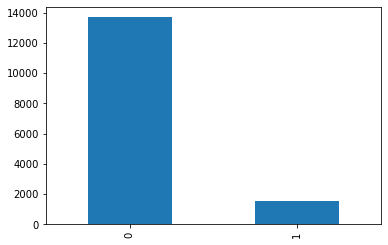

In [129]:
train_dataset_distribution = df_labels['Label'].value_counts()
print(train_dataset_distribution)
train_dataset_distribution.plot.bar()

La distribución de las imágenes de entrenamiento son de 13,694 sin el virus y 1,570 con el virus.

### 4. Resultado de modelos

In [13]:
#Librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Librería para trabajar con imágenes
import cv2

#Librería para separación de data
from sklearn.model_selection import train_test_split

#

#### Equilibrando la data
Para esta ocasión decidimos reducir el número de observaciones y equilibrar el número de imágenes según sus etiquetas.

In [15]:
df_labels = pd.read_csv('train_labels.csv')
df_labels.head()

,File,Label
0,1329638562-58609.jpg,0
1,956062378-32202.jpg,0
2,118943055-21826.jpg,1
3,211517-1778.jpg,0
4,1001547600-2101.jpg,0


In [17]:
df_labels_0 = df_labels[df_labels['Label']==0]
df_labels_0.head()

,File,Label
0,1329638562-58609.jpg,0
1,956062378-32202.jpg,0
3,211517-1778.jpg,0
4,1001547600-2101.jpg,0
5,526964795-20414.jpg,0


In [18]:
df_labels_0.shape

(13694, 2)

Usamos el sampleo de pandas para quedarnos con una muestra del 11% del total de imágenes con etiqueta 0

In [19]:
df_labels_0 = df_labels_0.sample(frac = 0.11,random_state = 10)
df_labels_0.head()

,File,Label
2092,1403712123-59135.jpg,0
6996,1041161104-7902.jpg,0
13555,1004421254-15493.jpg,0
3420,418861790-46858.jpg,0
8462,491117374-29480.jpg,0


In [20]:
df_labels_0.shape

(1506, 2)

In [21]:
df_labels_1 = df_labels[df_labels['Label'] == 1]
df_labels_1.head()

,File,Label
2,118943055-21826.jpg,1
7,70931608-56075.jpg,1
18,133962154-43100.jpg,1
19,65337612-34.jpg,1
28,158932273-23566.jpg,1


In [22]:
print(df_labels_0.shape)
print(df_labels_1.shape)

(1506, 2)
(1570, 2)


In [25]:
new_df_labels = pd.concat([df_labels_1,df_labels_0],axis = 0)
new_df_labels.head()

,File,Label
2,118943055-21826.jpg,1
7,70931608-56075.jpg,1
18,133962154-43100.jpg,1
19,65337612-34.jpg,1
28,158932273-23566.jpg,1


In [26]:
new_df_labels.shape

(3076, 2)

Una vez unida la data usamos la funcionalidad de pandas "sample" para reordenar las observaciones de manera aleatoria

In [32]:
new_df_labels = new_df_labels.sample(frac = 1).reset_index(drop = True)
new_df_labels.head()

,File,Label
0,281530062-22180.jpg,0
1,172512385-44378.jpg,1
2,18049885-42020.jpg,0
3,119537199-56640.jpg,1
4,62789884-36476.jpg,0


In [33]:
new_df_labels.shape

(3076, 2)

## Entrenamiento de una red convolucional en DenseNet para predecir si una persona fue infectada de covid

### Obteniendo las imágenes en listas y objetos Numpy para el entrenamiento

**División del dataset en datos de entrenamiento y testeo**

In [35]:
#Division del dataset de imagenes para entrenamiento y validacion
x_train, x_test, y_train, y_test = train_test_split(new_df_labels.File, new_df_labels.Label, test_size = 0.20, random_state = 0)

In [36]:
print(x_train.shape)
print(x_test.shape)

(2460,)
(616,)


In [37]:
x_train.head()

783        4725699-53929.jpg
1313    1268547127-34660.jpg
346     1274617115-21875.jpg
1436      49150169-52401.jpg
141       169453208-4287.jpg
Name: File, dtype: object

**Recuperación de las imágenes en directorio**

In [96]:
def TransformImage(im):
    width = 224
    heigth = 224
    dsize = (width,heigth)
    #Reescalamos la imagen 224x224
    new_im = cv2.resize(im,dsize)
    #Imagen en escala de grises
    new_im = new_im.mean(axis = 2)
    #Reescalamiento de valores
    new_im = new_im/255.0
    return new_im

def ListImages(imgs_name):
    imagenes = []
    for name_image in imgs_name.values:
        im = cv2.imread('Train/'+name_image)
        im = TransformImage(im)
        imagenes.append(im)
    return imagenes    

**Almacenamos las imagenes en una lista de entranamiento y testeo**

In [91]:
imgs_train = ListImages(x_train)

In [92]:
imgs_val = ListImages(x_test)

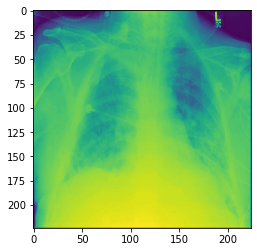

In [93]:
plt.imshow(imgs_train[1])

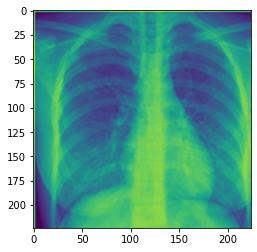

In [98]:
plt.imshow(imgs_val[1])

**Almacenamos en un arreglo de numpy los labels de entrenamiento y validación**

In [49]:
label_train = y_train.to_numpy()
label_val = y_test.to_numpy()

**Almacenamos en un arreglo numpy las imágenes**

In [100]:
imgs_train = np.array(imgs_train)
imgs_val = np.array(imgs_val)

**Una vez se tenga las imágenes y labels en objetos Numpy estas ya estarían listas para ser entrenadas en el modelo a desarrollar**

In [ ]:
model = tf.keras.applications.densenet.DenseNet121(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
    #classifier_activation='softmax'
)

In [102]:
def densenet(input_shape, n_classes, filters = 8):
   
   #batch norm + relu + conv
   #Inside a dense block
   def bn_rl_conv(x,filters,kernel=1,strides=1):
       
       x = BatchNormalization()(x)
       x = ReLU()(x)
       x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
       return x
   
   #Call a dense block
   def dense_block(x, repetition):
       
       for _ in range(repetition):
           y = bn_rl_conv(x, 4*filters)
           y = bn_rl_conv(y, filters, 3)
           x = concatenate([y,x])
       return x
       
   #Transition layer
   def transition_layer(x):
       
       x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
       x = AvgPool2D(2, strides = 2, padding = 'same')(x)
       return x
   
   #Starting the model design
   input = Input (input_shape)
   x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
   x = MaxPool2D(3, strides = 2, padding = 'same')(x)
   
   #dense block + transition layers repetitions
   for repetition in [6,12]:
       
       d = dense_block(x, repetition)
       x = transition_layer(d)
   #Classification layer
   x = GlobalAveragePooling2D()(d)
   output = Dense(n_classes, activation = 'softmax')(x)
   
   model = Model(input, output)
   return model

input_shape = 224, 224, 1
n_classes = 2
model = densenet(input_shape,n_classes)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 112, 112, 64  3200        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_121[0][0]']             
                                                                                            

In [103]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, 
                    validation_data=(x_test, y_test))
                    #validation_split=0.2)

Epoch 1/3


ValueError: in user code:

    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model_1" (type Functional).
    
    Input 0 of layer "conv2d_121" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer "model_1" (type Functional):
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=True
      • mask=None


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)

In [ ]:
print(test_acc)

#### Segundo intento con TensorFlow

In [68]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
#Librerias tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

In [69]:
# Obteniendo las imagenes con Dataset de tensor flow
datadir = './Train'
image_count = 15264
list_ds = tf.data.Dataset.list_files(str(datadir+'/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [70]:
for f in list_ds.take(10):
    print(f.numpy())

b'.\\Train\\406133533-51673.jpg'
b'.\\Train\\509849263-55758.jpg'
b'.\\Train\\130349264-2013.jpg'
b'.\\Train\\218038614-3705.jpg'
b'.\\Train\\507328186-24301.jpg'
b'.\\Train\\1112913015-63988.jpg'
b'.\\Train\\200531845-57347.jpg'
b'.\\Train\\60781353-13151.jpg'
b'.\\Train\\1502152289-12536.jpg'
b'.\\Train\\62637857-33029.jpg'


In [71]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [72]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

12233
3052


In [73]:
data_label = pd.read_csv('train_labels.csv')
data_label.shape

(15264, 2)

In [74]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  file = parts[-1]
  # Integer encode the label
  serie = data_label[data_label['File'] == file]['Label']
  if serie.size == 0:
    return 0
  else:
    return int(serie)

In [75]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=1)
  # Resize the image to the desired size
  img_height = 224
  img_width = 224
  return tf.image.resize(img, [img_height, img_width])

In [76]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [77]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path)#, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path)#, num_parallel_calls=AUTOTUNE)

In [78]:
#Continuing on this mode

for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 1)
Label:  0


In [79]:
#feaures
batch_size = 32

def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  #ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

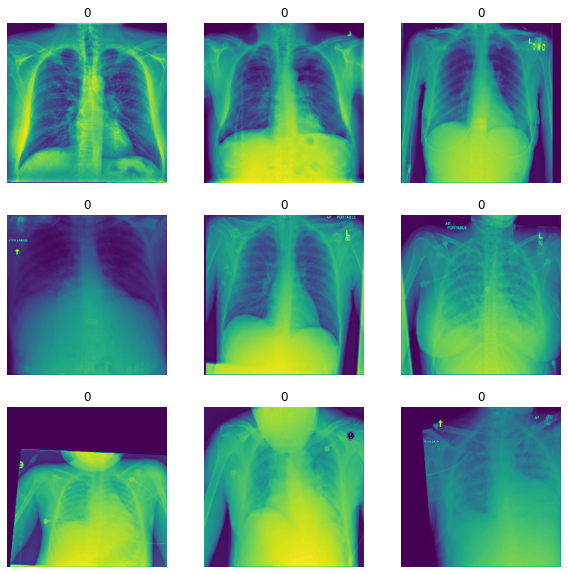

In [80]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(int(label))
  plt.axis("off")

In [82]:
train_ds.take(2)

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [83]:
def densenet(input_shape, n_classes, filters = 32):
   
   #batch norm + relu + conv
   #Inside a dense block
   def bn_rl_conv(x,filters,kernel=1,strides=1):
       
       x = BatchNormalization()(x)
       x = ReLU()(x)
       x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
       return x
   
   #Call a dense block
   def dense_block(x, repetition):
       
       for _ in range(repetition):
           y = bn_rl_conv(x, 4*filters)
           y = bn_rl_conv(y, filters, 3)
           x = concatenate([y,x])
       return x
       
   #Transition layer
   def transition_layer(x):
       
       x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
       x = AvgPool2D(2, strides = 2, padding = 'same')(x)
       return x
   
   #Starting the model design
   input = Input (input_shape)
   x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
   x = MaxPool2D(3, strides = 2, padding = 'same')(x)
   
   #dense block + transition layers repetitions
   for repetition in [6,12,24,16]:
       
       d = dense_block(x, repetition)
       x = transition_layer(d)
   #Classification layer
   x = GlobalAveragePooling2D()(d)
   output = Dense(n_classes, activation = 'softmax')(x)
   
   model = Model(input, output)
   return model

input_shape = 224, 224, 1
n_classes = 2
model = densenet(input_shape,n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  3200        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #from_logits=True),
              metrics=['accuracy'])

In [85]:
history = model.fit(train_ds.take(10))

10/10 [==============================] - 282s 25s/step - loss: 0.0593 - accuracy: 0.9844


### Resultado Final

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import cv2
import numpy as np
#Librerias tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

In [106]:
new_df_labels.shape

(3076, 2)

In [107]:
def TransformImage(im):
    width = 224
    heigth = 224
    dsize = (width,heigth)
    #Reescalamos la imagen 224x224
    new_im = cv2.resize(im,dsize)
    #Imagen en escala de grises
    new_im = new_im.mean(axis = 2)
    #Reescalamiento de valores
    new_im = new_im/255.0
    return new_im

def ListImages(imgs_name):
    imagenes = []
    for name_image in imgs_name.values:
        im = cv2.imread('Train/'+name_image)
        im = TransformImage(im)
        imagenes.append(im)
    return imagenes   

In [108]:
imgs = ListImages(new_df_labels.File)

In [109]:
imgs = np.array(imgs)

In [110]:
labels = new_df_labels.Label.to_numpy()

In [111]:
print(type(imgs))
print(type(labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [112]:
df_tensor_imgs = tf.data.Dataset.from_tensor_slices(imgs)
df_tensor_labels = tf.data.Dataset.from_tensor_slices(labels)

In [113]:
df_tensor = tf.data.Dataset.zip((df_tensor_imgs,df_tensor_labels))

In [114]:
tam = labels.shape[0]
val_size = int(tam * 0.2)
df_train_tensor = df_tensor.skip(val_size)
df_val_tensor = df_tensor.take(val_size)

In [115]:
print(tf.data.experimental.cardinality(df_train_tensor).numpy())
print(tf.data.experimental.cardinality(df_val_tensor).numpy())

2461
615


In [116]:
for image, label in df_train_tensor.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224)
Label:  0


In [117]:
#feaures
batch_size = 8

def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  #ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

df_train_tensor = configure_for_performance(df_train_tensor)
df_val_tensor = configure_for_performance(df_val_tensor)

In [118]:
def densenet(input_shape, n_classes, filters = 8):
   
   #batch norm + relu + conv
   #Inside a dense block
   def bn_rl_conv(x,filters,kernel=1,strides=1):
       
       x = BatchNormalization()(x)
       x = ReLU()(x)
       x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
       return x
   
   #Call a dense block
   def dense_block(x, repetition):
       
       for _ in range(repetition):
           y = bn_rl_conv(x, 4*filters)
           y = bn_rl_conv(y, filters, 3)
           x = concatenate([y,x])
       return x
       
   #Transition layer
   def transition_layer(x):
       
       x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
       x = AvgPool2D(2, strides = 2, padding = 'same')(x)
       return x
   
   #Starting the model design
   input = Input (input_shape)
   x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
   x = MaxPool2D(3, strides = 2, padding = 'same')(x)
   
   #dense block + transition layers repetitions
   for repetition in [6,12]:
       
       d = dense_block(x, repetition)
       x = transition_layer(d)
   #Classification layer
   x = GlobalAveragePooling2D()(d)
   output = Dense(n_classes, activation = 'softmax')(x)
   
   model = Model(input, output)
   return model

input_shape = 224, 224, 1
n_classes = 2
model = densenet(input_shape,n_classes)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_160 (Conv2D)            (None, 112, 112, 64  3200        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 56, 56, 64)  0           ['conv2d_160[0][0]']             
                                                                                            

In [119]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #from_logits=True),
              metrics=['accuracy'])

In [138]:
epochs = 10
history = model.fit(df_train_tensor.take(50),
                   validation_data = df_val_tensor.take(50),
                   epochs = epochs )

Epoch 1/10
50/50 [==============================] - 96s 2s/step - loss: 0.5113 - accuracy: 0.7525 - val_loss: 1.3410 - val_accuracy: 0.5175
Epoch 2/10
50/50 [==============================] - 123s 2s/step - loss: 0.4877 - accuracy: 0.7800 - val_loss: 0.8868 - val_accuracy: 0.5100
Epoch 3/10
50/50 [==============================] - 116s 2s/step - loss: 0.5340 - accuracy: 0.7325 - val_loss: 0.5214 - val_accuracy: 0.7675
Epoch 4/10
50/50 [==============================] - 105s 2s/step - loss: 0.4851 - accuracy: 0.7600 - val_loss: 0.5258 - val_accuracy: 0.7525
Epoch 5/10
50/50 [==============================] - 105s 2s/step - loss: 0.5227 - accuracy: 0.7450 - val_loss: 0.4613 - val_accuracy: 0.7900
Epoch 6/10
50/50 [==============================] - 105s 2s/step - loss: 0.4949 - accuracy: 0.7925 - val_loss: 0.9775 - val_accuracy: 0.5925
Epoch 7/10
50/50 [==============================] - 110s 2s/step - loss: 0.4798 - accuracy: 0.7800 - val_loss: 0.5838 - val_accuracy: 0.7175
Epoch 8/10
50/

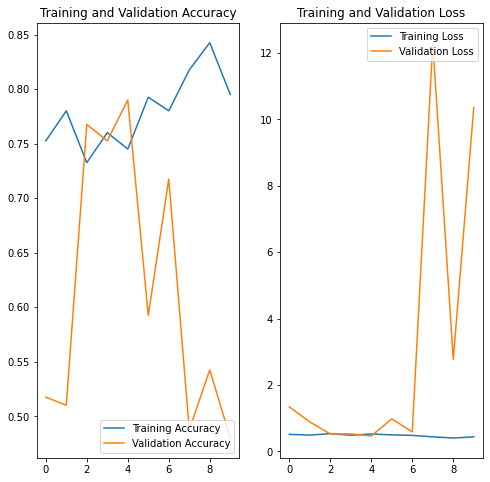

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [140]:
img = imgs[5]
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image has score{} and the max is {} and the real value is {}."
    .format(score,np.max(score),labels[5])
)

1/1 [==============================] - 0s 306ms/step
This image has score[0.26894143 0.7310586 ] and the max is 0.7310585975646973 and the real value is 0.


La probabilidad de que la imagen represente una persona que haya infectada de covid es del 48%

### 6. Conclusiones

En el presente proyecto se ha intentado elaborar el modelo de DenseNet con dos métodos, uno haciendo uso de la librería cv2 y tensorflow, sin embargo aún no se ha logrado concretar un modelo óptimo. Hemos notado que la data se encuentra en un formato especial, con los labels separados en un archivo .csv, para luego, que en la carpeta de train existen más archivos de fotos(15284) que lo que menciona en el .csv. (15264).

### 7. Recomendaciones

Pará este caso una de las grandes limitaciones que encontramos fue el uso excesivo de memoria RAM que usan los modelos de tensor Flow y keras. Esto ocurre a la hora de usar la función model.fit(). Tras buscar soluciones en Internet encontramos que es un problema común al usar esta librería por lo que recomendaríamos que tensor Flow y keras optimize esta función, o en caso contrario recomendaríamos usar una computadora con 16 gb de RAM o más. 
También creemos que debido a cómo está optimizado la función model.fit() creemos que una posible solución sería reducir el número de imágenes y labels que se encuentran en las variables de train.

### 8. Referencias bibliográficas

- https://arxiv.org/abs/1608.06993
- https://towardsdatascience.com/review-densenet-image-classification-b6631a8ef803
- https://amaarora.github.io/2020/08/02/densenets.html
- https://towardsdatascience.com/review-densenet-image-classification-b6631a8ef803
- https://arxiv.org/abs/1608.06993
